In [24]:
# Import dependencies
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import pickle

In [3]:
# Load File
path = "Resources/players_fifa22.csv"
df = pd.read_csv(path)

In [6]:
# df.columns

In [7]:
# Dropping all Goal Keepers
df = df[(df["BestPosition"] != "GK")]

In [8]:
# Changing High Medium and Low Values
df = df.replace(["High", "Medium", "Low"], [2,1,0])

In [9]:
# Create List of Columns to drop
columns_to_drop = ["ID","Name","FullName","PhotoUrl","Nationality","Potential","Growth","TotalStats",
                    "BaseStats","Positions","BestPosition","Club","ClubPosition","ContractUntil","ClubNumber",
                    "ClubJoined","OnLoad","NationalTeam","NationalPosition","NationalNumber", "IntReputation",
                    "PreferredFoot",'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
                    'STRating', 'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating',
                    'CAMRating', 'LMRating', 'CMRating', 'RMRating', 'LWBRating',
                    'CDMRating', 'RWBRating', 'LBRating', 'CBRating', 'RBRating',
                    'GKRating']

# Drop Columns
df = df.drop(columns=columns_to_drop)

In [10]:
# df.columns

In [11]:
# # Create Correlation Matrix
# name = df.corr()
# plt.subplots(figsize=(100,100))
# sn.heatmap(name, annot=True)  
# plt.savefig("CorrelationHeatMap.png")
# plt.show()

In [12]:
# Dropping higly co-relateed columns
drop_columns = ["Finishing","Dribbling",'Acceleration','SprintSpeed',"StandingTackle",
                'Marking', 'StandingTackle', 'SlidingTackle',"Reactions"]

#Create new Dataframe
new_df = df.drop(columns=drop_columns)
# Drop all null values
new_df=new_df.dropna()
# Save new csv
new_df.to_csv('Resources/FIFA_df_final.csv')

In [13]:
# Use get dummies to encode the data
new_df2=pd.get_dummies(new_df)

In [14]:
# Create variables for features and targets
y = new_df2["Overall"]
y1 = new_df2["ValueEUR"]
y2 = new_df2["WageEUR"]
y3 = new_df2["ReleaseClause"]
X = new_df2.drop(columns=["Overall", "ValueEUR", "WageEUR", "ReleaseClause"])
X.head()

,Age,Height,Weight,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,...,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure
0,34,170,72,4,4,1,0,85,92,91,...,68,72,69,94,44,40,93,95,75,96
1,32,185,81,4,4,2,1,78,92,79,...,85,76,86,87,81,49,95,81,90,88
2,36,187,83,4,5,2,0,87,94,80,...,95,77,77,93,63,29,95,76,88,95
3,22,182,73,4,5,2,0,97,88,80,...,78,88,77,82,62,38,92,82,79,88
5,30,181,70,5,4,2,2,76,86,93,...,63,89,74,91,76,66,88,94,83,89


In [17]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# Scale the data using Standard Scaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Get a random forest classifier score# Use a Random FOrest Regressor to create a prediction model
clr0 = RandomForestRegressor()
clr0.fit(X_train_scaled, y_train)
clr0.score(X_test_scaled, y_test)

0.9736948909889085

In [19]:
sorted(list(zip(clr0.feature_importances_, X_train.columns)), reverse=True)

[(0.45098030134568773, 'Composure'),
 (0.2181580887050258, 'BallControl'),
 (0.16557260035448532, 'DefendingTotal'),
 (0.030767837815064036, 'DribblingTotal'),
 (0.02791377502317507, 'Positioning'),
 (0.018589476802346867, 'Crossing'),
 (0.016083705008662845, 'ShootingTotal'),
 (0.010750044352451289, 'PhysicalityTotal'),
 (0.010294199376855702, 'Stamina'),
 (0.0076146202981426945, 'PaceTotal'),
 (0.0061194346547090595, 'ShortPassing'),
 (0.00579696192355374, 'Interceptions'),
 (0.004057598927037036, 'HeadingAccuracy'),
 (0.003943819116059768, 'PassingTotal'),
 (0.002351671806838909, 'Aggression'),
 (0.0023455078075281257, 'Age'),
 (0.0018826141465103274, 'ShotPower'),
 (0.0017343156276966244, 'Vision'),
 (0.0016203487410934732, 'LongShots'),
 (0.0014966899152761097, 'LongPassing'),
 (0.0014693648669851758, 'Strength'),
 (0.0013283116249465387, 'Agility'),
 (0.001314653183252907, 'Jumping'),
 (0.0011267297202556552, 'Volleys'),
 (0.001040727872547591, 'Penalties'),
 (0.00101822333485667

<AxesSubplot:>

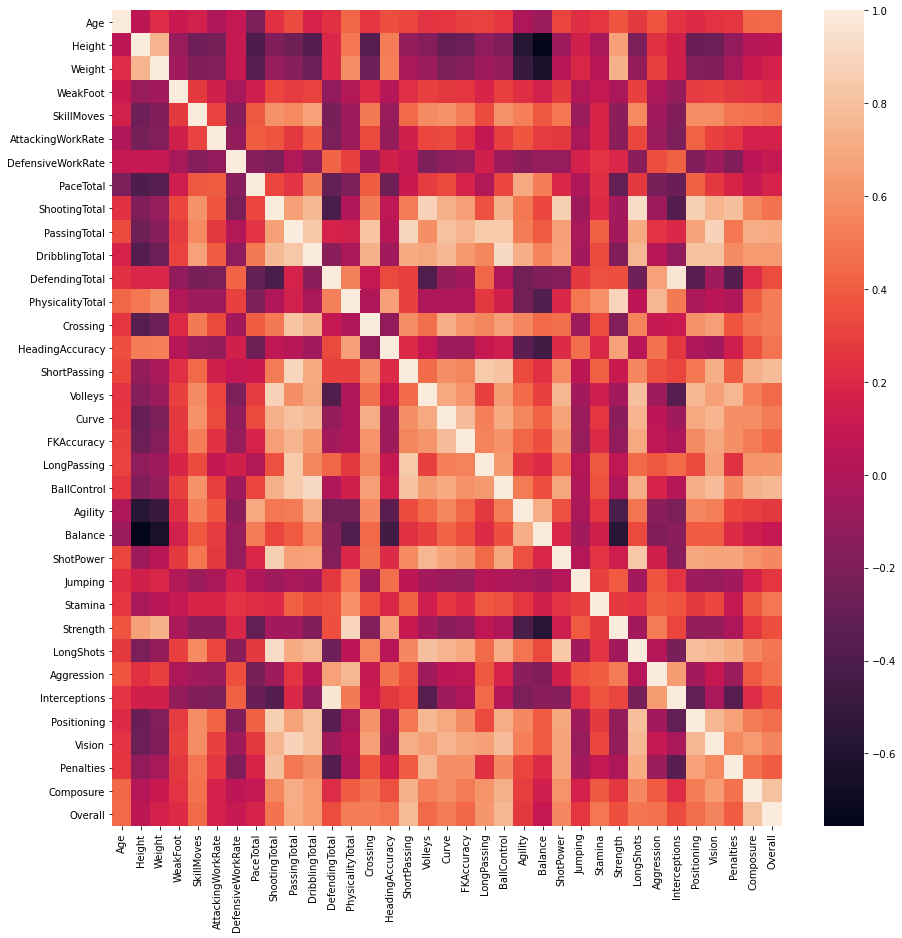

In [20]:
# View Co-realtion matrix for X and Y
plt.figure(figsize=(15, 15))
sn.heatmap(pd.concat([X,y], axis=1).corr())

In [21]:
# Predicting Values in Euros
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.1)
# Scale the data using Standard Scaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Use a Random FOrest Regressor to create a prediction model
clr1 = RandomForestRegressor()
clr1.fit(X_train_scaled, y_train)
clr1.score(X_test_scaled, y_test)

0.8712784930163958

In [22]:
# Predicting Wages in Euros
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.1)
# Scale the data using Standard Scaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Use a Random FOrest Regressor to create a prediction model
clr2 = RandomForestRegressor()
clr2.fit(X_train_scaled, y_train)
clr2.score(X_test_scaled, y_test)

0.7143414211105701

In [23]:
# Predicting Release Clause
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.1)
# Scale the data using Standard Scaler
scaler = StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Use a Random FOrest Regressor to create a prediction model
clr3 = RandomForestRegressor()
clr3.fit(X_train_scaled, y_train)
clr3.score(X_test_scaled, y_test)

0.7998687918657164

In [29]:
# Save Models and scaler using pickle
# pickle.dump(scaler, open("models/scaler.sav", "wb"))
# pickle.dump(clr0, open("models/clr0.sav", "wb"))
# pickle.dump(clr1, open("models/clr1.sav", "wb"))
# pickle.dump(clr2, open("models/clr2.sav", "wb"))
# pickle.dump(clr3, open("models/clr3.sav", "wb"))